**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный рейтинг: бальная оценка клиента
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [4]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
Home Ownership                  2500 non-null object
Annual Income                   1987 non-null float64
Years in current job            2414 non-null object
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    1142 non-null float64
Bankruptcies                    2497 non-null float64
Purpose                         2500 non-null object
Term                            2500 non-null object
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    1987 non-null float64
dtypes: float64(12), object(4)
me

In [5]:
df_train.shape

(7500, 17)

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


## Credit Default

In [7]:
#df_train_result = df_train['Credit Default']
#df_train.drop(['Credit Default'], inplace=True, axis=1)

## Home Ownership
домовладение

In [8]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [9]:
dummies = pd.get_dummies(df_train['Home Ownership']).rename(columns=lambda x: 'Home Ownership ' + str(x))
df_train = pd.concat([df_train, dummies], axis=1)
df_train.drop(['Home Ownership'], inplace=True, axis=1)

In [10]:
dummies = pd.get_dummies(df_test['Home Ownership']).rename(columns=lambda x: 'Home Ownership ' + str(x))
df_test = pd.concat([df_test, dummies], axis=1)
df_test.drop(['Home Ownership'], inplace=True, axis=1)

In [11]:
##df_train.head(5)

In [12]:
##df_test.head(5)

## Annual Income
годовой доход

In [13]:
df_train.loc[(df_train['Annual Income'] > df_train['Annual Income'].quantile(.90)), :].shape

(595, 20)

In [14]:
df_train.loc[(df_train['Annual Income'].isnull()), ['Annual Income']] = df_train['Annual Income'].mean()

In [15]:
df_test.loc[(df_test['Annual Income'].isnull()), ['Annual Income']] = df_test['Annual Income'].mean()

## Years in current job
количество лет на текущем месте работы

In [16]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [17]:
def correct(value):
    if isinstance(value, int):
        return value
    if value == "< 1 year":
        return 0
    elif value == "1 year":
        return 1
    elif value == "2 years":
        return 2
    elif value == "3 years":
        return 3
    elif value == "4 years":
        return 4
    elif value == "5 years":
        return 5
    elif value == "6 years":
        return 6
    elif value == "7 years":
        return 7
    elif value == "8 years":
        return 8
    elif value == "9 years":
        return 9
    elif value == "10+ years":
        return 10
    else:
        return 0

df_train['Years in current job'] = df_train['Years in current job'].apply(correct)

In [18]:
df_test['Years in current job'] = df_test['Years in current job'].apply(correct)

In [19]:
##df_train.head(5)

In [20]:
##df_test.head(5)

## Tax Liens
налоговые обременения

In [21]:
df_train['Tax Liens'].describe()

count    7500.000000
mean        0.030133
std         0.271604
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Tax Liens, dtype: float64

In [22]:
df_train.loc[(df_train['Tax Liens'] > df_train['Tax Liens'].quantile(.75)), :].shape

(134, 20)

## Number of Open Accounts
количество открытых счетов

In [23]:
##df_train['Number of Open Accounts'].describe()

## Years of Credit History
количество лет кредитной истории

In [24]:
##df_train['Years of Credit History'].describe()

## Maximum Open Credit 
наибольший открытый кредит

In [25]:
##df_train['Maximum Open Credit'].describe()

## Number of Credit Problems
количество проблем с кредитом

In [26]:
##df_train['Number of Credit Problems'].describe()

## Months since last delinquent

In [27]:
##train_data_Msld_mean = df_train.loc[df_train['Months since last delinquent'].notnull(), 'Months since last delinquent'].mean(axis=0)
df_train.loc[df_train['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

##test_data_Msld_mean = df_test.loc[df_test['Months since last delinquent'].notnull(), 'Months since last delinquent'].mean(axis=0)
df_test.loc[df_test['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

## Bankruptcies
банкротства

In [28]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [29]:
df_train.loc[df_train['Bankruptcies'].isnull(), 'Bankruptcies'] = 0
df_test.loc[df_test['Bankruptcies'].isnull(), 'Bankruptcies'] = 0

## Purpose
цель кредита

In [30]:
df_train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [31]:
df_test['Purpose'].value_counts()

debt consolidation      1973
other                    240
home improvements        140
buy a car                 34
business loan             30
medical bills             27
buy house                 19
take a trip               14
major purchase             9
small business             5
vacation                   3
educational expenses       3
wedding                    2
moving                     1
Name: Purpose, dtype: int64

In [32]:
dummies = pd.get_dummies(df_train['Purpose']).rename(columns=lambda x: 'Purpose ' + str(x))
df_train = pd.concat([df_train, dummies], axis=1)
df_train.drop(['Purpose'], inplace=True, axis=1)
df_train.drop(['Purpose renewable energy'], inplace=True, axis=1)

dummies = pd.get_dummies(df_test['Purpose']).rename(columns=lambda x: 'Purpose ' + str(x))
df_test = pd.concat([df_test, dummies], axis=1)
df_test.drop(['Purpose'], inplace=True, axis=1)

In [33]:
#df_train.head()

In [34]:
#df_test.head()

## Term 
срок кредита

In [35]:
df_train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [36]:
df_test['Term'].value_counts()

Short Term    1861
Long Term      639
Name: Term, dtype: int64

In [37]:
df_train['Term'] = (df_train['Term'] == 'Long Term').astype(int)
df_test['Term'] = (df_test['Term'] == 'Long Term').astype(int)
df_train['Term'].value_counts()

0    5556
1    1944
Name: Term, dtype: int64

## Current Loan Amount
текущая сумма кредита

In [38]:
df_train['Current Loan Amount'].describe()

count    7.500000e+03
mean     1.187318e+07
std      3.192612e+07
min      1.124200e+04
25%      1.801690e+05
50%      3.095730e+05
75%      5.198820e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [39]:
df_test['Current Loan Amount'].describe()

count    2.500000e+03
mean     1.215572e+07
std      3.226097e+07
min      1.542200e+04
25%      1.871265e+05
50%      3.223660e+05
75%      5.225825e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [40]:
df_train.loc[ df_train['Current Loan Amount'] > df_train['Current Loan Amount'].quantile(.99), :].shape

(0, 33)

## Current Credit Balance
текущий кредитный баланс

In [41]:
df_train['Current Credit Balance'].describe()

count    7.500000e+03
mean     2.898332e+05
std      3.178714e+05
min      0.000000e+00
25%      1.142565e+05
50%      2.093230e+05
75%      3.604062e+05
max      6.506797e+06
Name: Current Credit Balance, dtype: float64

## Monthly Debt 
ежемесячный долг

In [42]:
df_train['Monthly Debt'].describe()

count      7500.000000
mean      18314.454133
std       11926.764673
min           0.000000
25%       10067.500000
50%       16076.500000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64

## Credit Score
кредитный рейтинг: бальная оценка клиента

In [43]:
df_train.loc[ df_train['Credit Score'] > df_train['Credit Score'].quantile(.99), ['Credit Score']].shape

(57, 1)

In [44]:
train_data_CS_mean = df_train.loc[df_train['Credit Score'].notnull(), 'Credit Score'].mean(axis=0)
df_train.loc[df_train['Credit Score'].isnull(), 'Credit Score'] = train_data_CS_mean

test_data_CS_mean = df_test.loc[df_test['Credit Score'].notnull(), 'Credit Score'].mean(axis=0)
df_test.loc[df_test['Credit Score'].isnull(), 'Credit Score'] = test_data_CS_mean

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 33 columns):
Annual Income                   7500 non-null float64
Years in current job            7500 non-null int64
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    7500 non-null float64
Bankruptcies                    7500 non-null float64
Term                            7500 non-null int32
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    7500 non-null float64
Credit Default                  7500 non-null int64
Home Ownership Have Mortgage    7500 non-null uint8
Home Ownership Home Mortgage    7500 

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 32 columns):
Annual Income                   2500 non-null float64
Years in current job            2500 non-null int64
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    2500 non-null float64
Bankruptcies                    2500 non-null float64
Term                            2500 non-null int32
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    2500 non-null float64
Home Ownership Have Mortgage    2500 non-null uint8
Home Ownership Home Mortgage    2500 non-null uint8
Home Ownership Own Home         2500 

In [47]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()

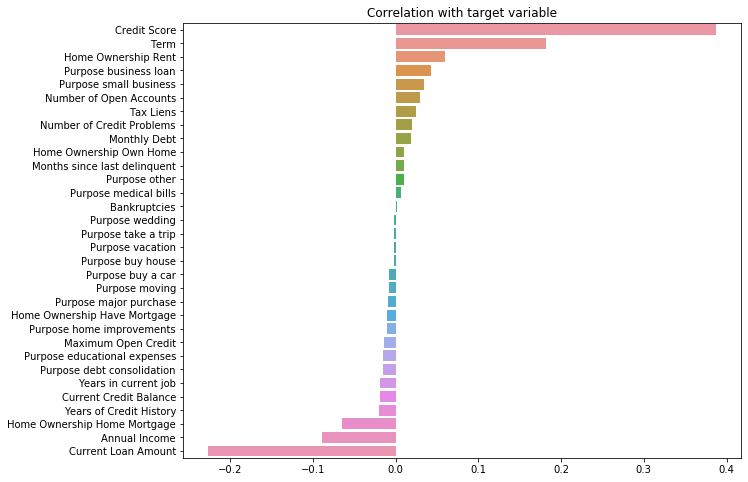

In [48]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

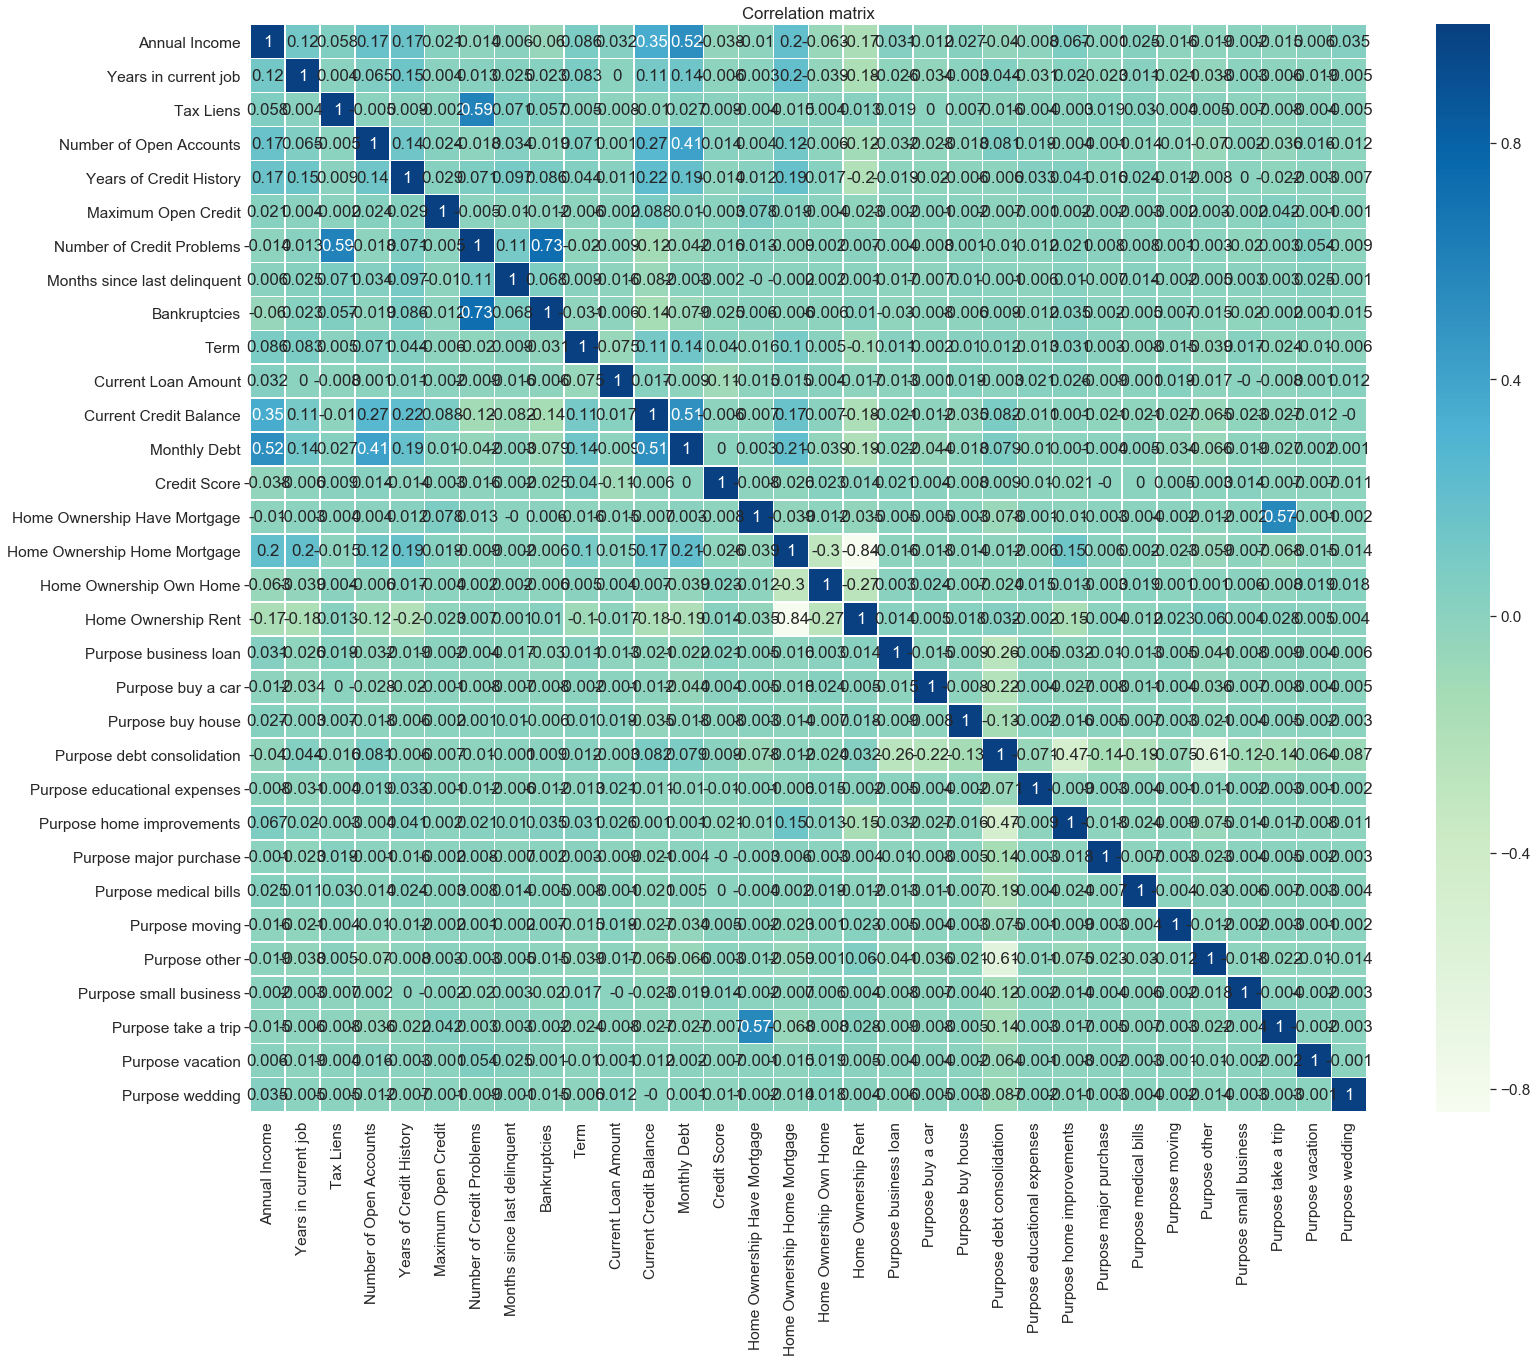

In [51]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [49]:
#df_train_result = df_train['Credit Default']
#df_train.drop(['Credit Default'], inplace=True, axis=1)